In [11]:
import pandas as pd
import numpy as np

import re
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 1: IO Bandwidth

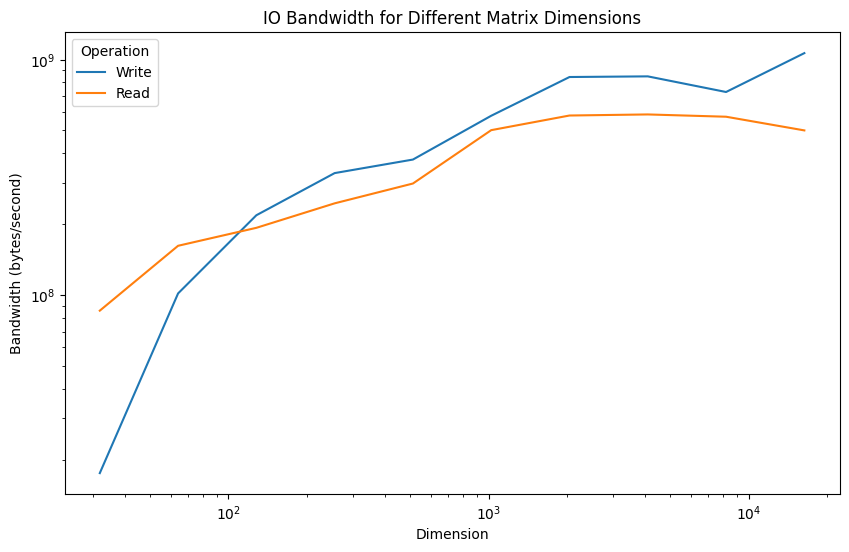

In [12]:
# Parse the text file
dimensions = []
write_times = []
read_times = []

with open('IObandwidth.txt', 'r') as f:
    for line in f:
        if "Write time" in line:
            match = re.match(r'Write time for dim = (\d+): (\d+\.\d+)ms', line)
            dimensions.append(int(match.group(1)))
            write_times.append(float(match.group(2)) / 1000)  # convert ms to s
        elif "Read time" in line:
            match = re.match(r'Read time for dim = (\d+): (\d+\.\d+)ms', line)
            read_times.append(float(match.group(2)) / 1000)  # convert ms to s

# Compute the bandwidths (bytes per second)
write_bandwidths = [dim*dim*8 / time for dim, time in zip(dimensions, write_times)]  # 8 bytes per double
read_bandwidths = [dim*dim*8 / time for dim, time in zip(dimensions, read_times)]  # 8 bytes per double

# Create a DataFrame
data = pd.DataFrame({
    'Dimension': dimensions + dimensions,
    'Bandwidth': write_bandwidths + read_bandwidths,
    'Operation': ['Write'] * len(dimensions) + ['Read'] * len(dimensions)
})

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Dimension', y='Bandwidth', hue='Operation')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Bandwidth (bytes/second)')
plt.title('IO Bandwidth for Different Matrix Dimensions')
plt.show()

## Problem 2

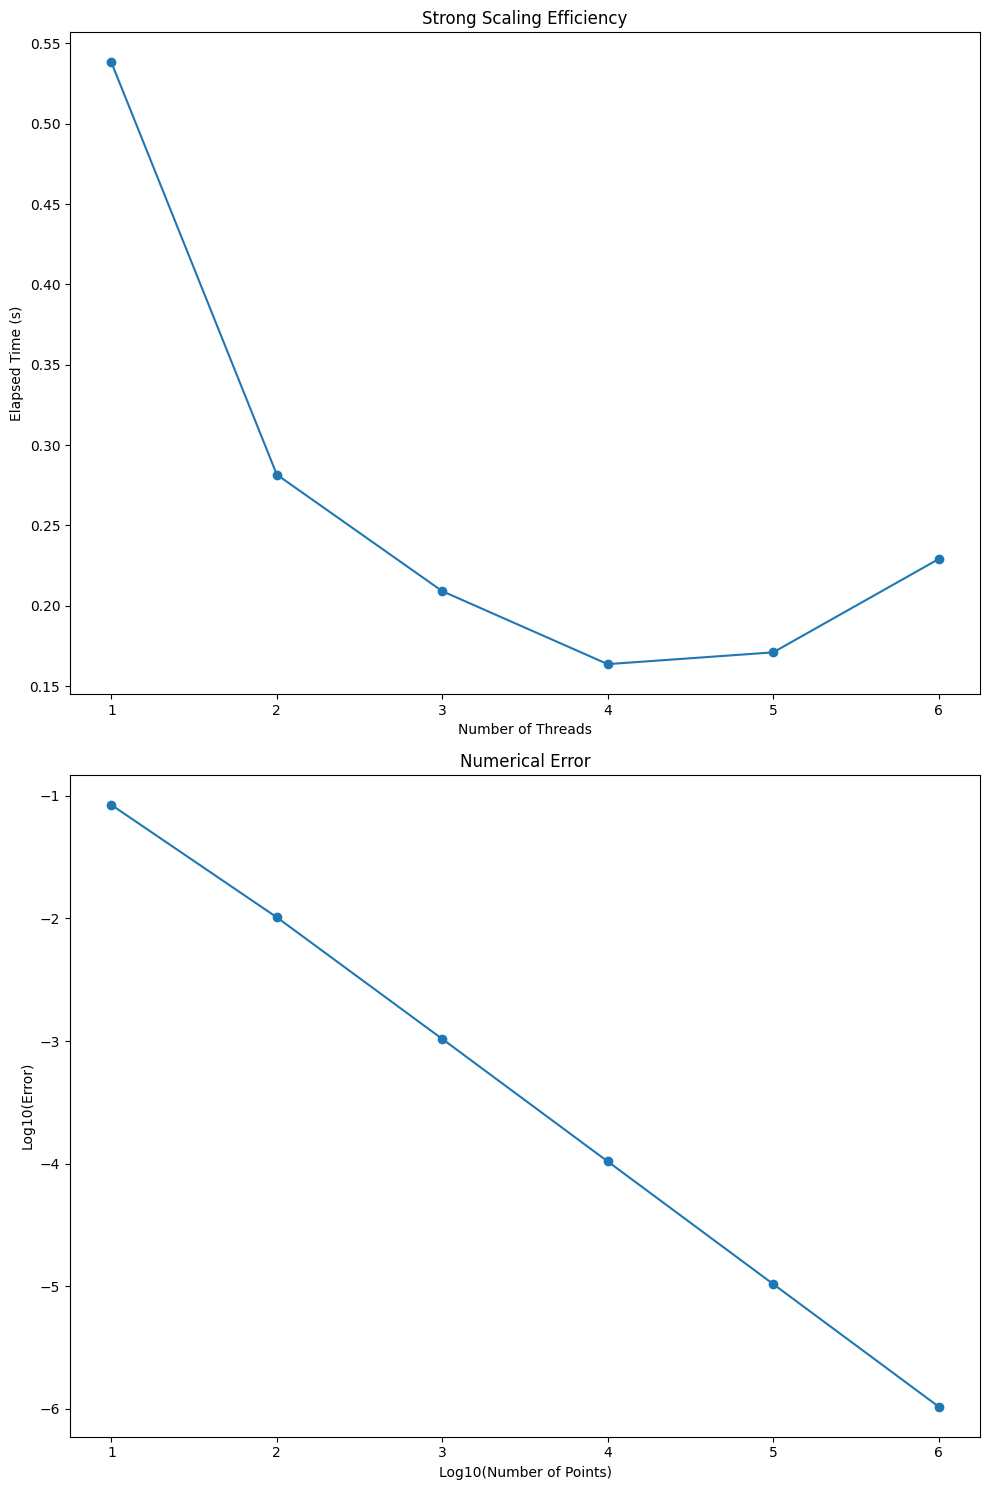

In [13]:
# Load the data from the text file
data = pd.read_csv('P2_data.txt', sep='\t')

# Create a figure and axes for the two plots
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 15))

# Plot the strong scaling efficiency
scaling_data = data[data['NumPoints'] == 100000000]
ax1.plot(scaling_data['NumThreads'], scaling_data['ElapsedTime'], marker='o')
ax1.set_xlabel('Number of Threads')
ax1.set_ylabel('Elapsed Time (s)')
ax1.set_title('Strong Scaling Efficiency')

# Plot the numerical error
error_data = data[(data['NumThreads'] == 6) & (data['NumPoints'] < 100000000)]
ax2.plot(np.log10(error_data['NumPoints']), np.log10(error_data['Error']), marker='o')
ax2.set_xlabel('Log10(Number of Points)')
ax2.set_ylabel('Log10(Error)')
ax2.set_title('Numerical Error')

# Show the plots
plt.tight_layout()
plt.show()

## Problem 3

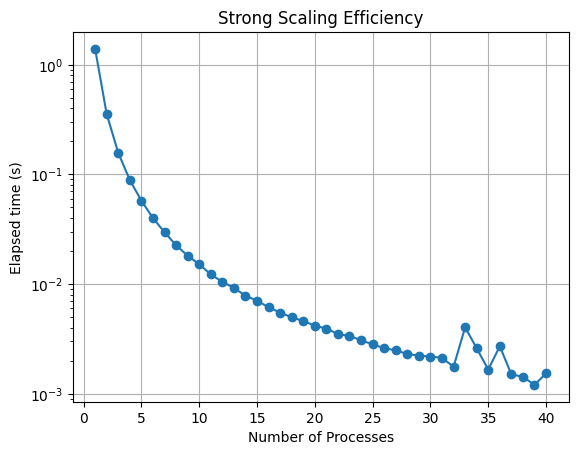

In [44]:
import matplotlib.pyplot as plt

# Read output file
with open('p3-out.txt', 'r') as file:
    lines = file.readlines()

# Extract elapsed time
elapsed_time = np.array([float(line.split()[-1].strip('s')) for line in lines if "Elapsed Time:" in line])

# Number of processes
num_procs = np.arange(1, 41)

# Calculate efficiency
#reference_time = elapsed_time[0]
#efficiency = [reference_time / (num_proc * elapsed_time[num_proc - 1]) for num_proc in num_procs]

## 

eff = elapsed_time/num_procs

# Plot efficiency
plt.plot(num_procs, eff, '-o')
plt.xlabel('Number of Processes')
plt.ylabel('Elapsed time (s)')
plt.title('Strong Scaling Efficiency')
plt.yscale('log')  # Change to log scale
plt.grid()
plt.show()


/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


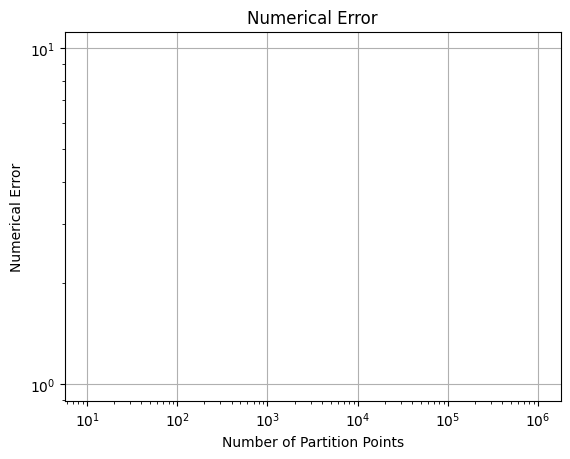

In [45]:
import matplotlib.pyplot as plt

# Read output file
with open('p3-outc.txt', 'r') as file:
    lines = file.readlines()

# Extract error
errors = [float(line.split()[-1]) for line in lines if "Error:" in line]

# Partition points
partition_points = [10, 100, 1000, 10000, 100000, 1000000]

# Plot error
plt.loglog(partition_points, errors, '-o')
plt.xlabel('Number of Partition Points')
plt.ylabel('Numerical Error')
plt.title('Numerical Error')
plt.grid()
plt.show()


## Problem 4